# TP Decision Tree with sklearn [regression]

In [3]:
import numpy as np # import la librairie numpy (calcul scientifique)
import matplotlib.pyplot as plt # librairie pour afficher les graphs.
%matplotlib inline  

import sklearn # if not installed : $ pip install sklearn

## Decision Tree
http://scikit-learn.org/stable/modules/tree.html

# Regression
data : 1 dimension  
valeur objectives : scalaire

In [4]:
np.random.seed(42) # Fix the random seed

# Create a noisy sinus dataset
def regression_data():
    
    X = np.sort(5 * np.random.rand(80,1), axis=0)
    y = np.sin(X).ravel()
    y[::5] += 3 * (0.5 - np.random.rand(16)) # ajout de bruit
    
    X_test = np.arange(0.0, 5.0, 0.05)[:, np.newaxis]
    y_test = np.sin(X_test).ravel()
    return X,y,X_test,y_test


In [5]:
X,y, X_test,y_test = regression_data()

In [6]:
X.shape

(80, 1)

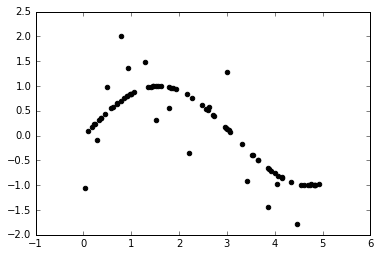

In [7]:
plt.scatter(X, y, c="k")

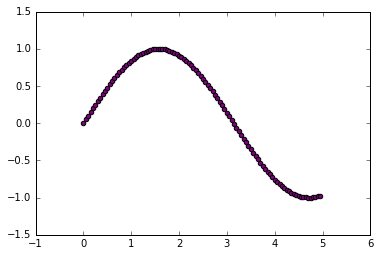

In [8]:
plt.scatter(X_test, y_test, c="purple")

In [9]:
def score_regression(y_pred, y_true):
    """ return 1/N \sum_i |ŷ_i -y_i|^2"""
    
    err = 0
    for i in range(len(y_pred)):
        err += (y_pred[i] - y_true[i])**2
            
    return err / len(y_pred)

In [10]:
def score_regression_py(y_pred, y_true):
    """ return 1/N (y_pred - y_true)^2"""
    
    return np.linalg.norm(y_pred - y_true)**2 / len(y_pred)

In [11]:
def reg0(x):
    return 0.122

In [12]:
def regsin(x):
    return np.sin(x)

In [13]:
score_regression([reg0(x) for x in X], y)

0.66531093692666032

In [14]:
score_regression([regsin(x) for x in X], y)

array([ 0.11139367])

## Decision Tree

In [15]:
from sklearn import tree
# http://scikit-learn.org/stable/modules/tree.html

In [16]:
clf = tree.DecisionTreeRegressor(max_depth=None, min_samples_split=2, min_samples_leaf=1) 
# genere un classifieur basé sur un arbre de decision.

In [17]:
clf.fit(X, y) # entraine le classifieur sur les données

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [18]:
y_pred = clf.predict(X_test) # predit y sur de nouvelles données.

## Exercices 
- Entrainer un DecisionTreeRegressor sur le jeu de données.
- évaluer son score sur l'ensemble d'entrainement (X,y)
- évaluer son score sur l'ensemble de test


In [19]:
from sklearn import tree

clf = tree.DecisionTreeRegressor() 
clf.fit(X, y)
y_pred = clf.predict(X)

In [20]:
score_train = score_regression(clf.predict(X), y)
print('score_train = ', score_train)

score_train =  2.9632306832e-09


In [22]:
# Predict on test set
y_1 = clf.predict(X_test)
score_test = score_regression(clf.predict(X_test), y_test)
print('score_test =', score_test)

score_test = 0.112468286435


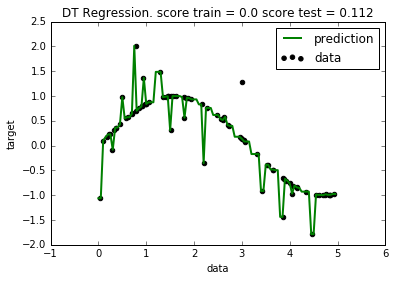

In [23]:
# Plot the results
plt.scatter(X, y, c="k", label="data")
plt.plot(X_test, y_1, c="g", label="prediction", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("DT Regression. score train = " + str(np.round(score_train,3)) +\
        " score test = " + str(np.round(score_test,3)))
plt.legend()

## Exercices
- Dans une boucle, faire varier le paramètre 'max_depth' et afficher les predictions  
- Afficher sur un même graphe l'évolution du score d'entrainement et du score de test  

#### Avec la validation

- À l'aide d'un ensemble de validation, et sans utiliser l'ensemble de test, estimer la meilleur valeur pour 'max_depth'

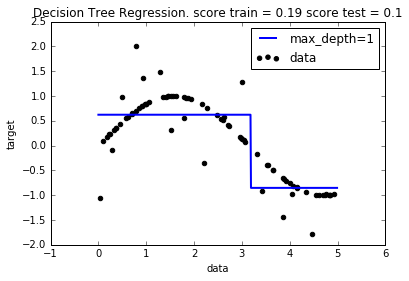

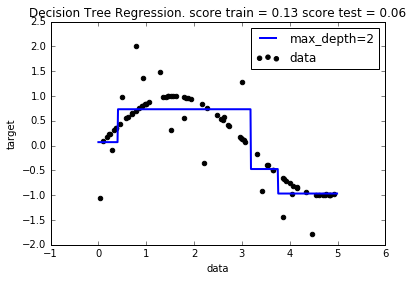

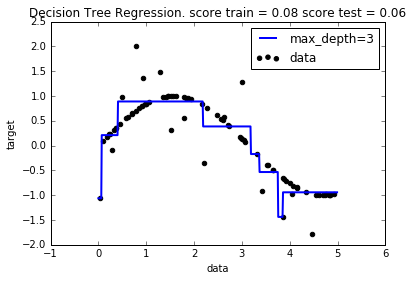

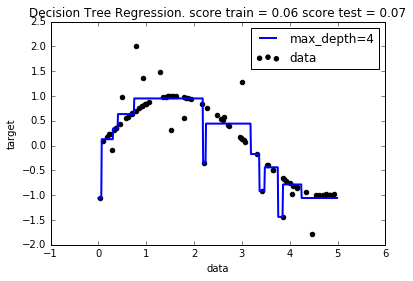

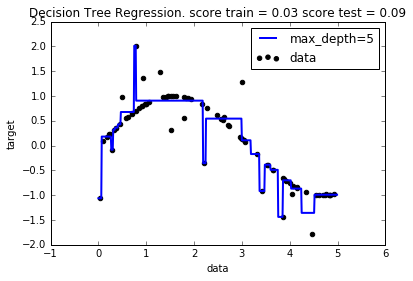

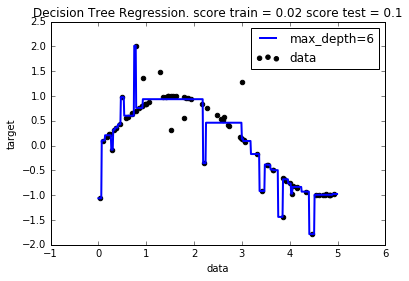

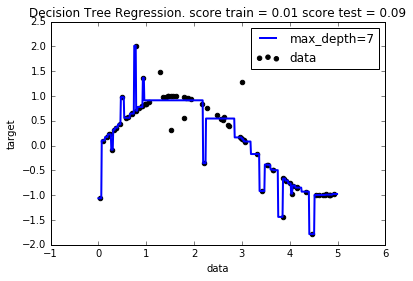

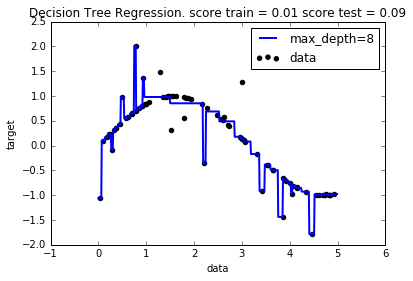

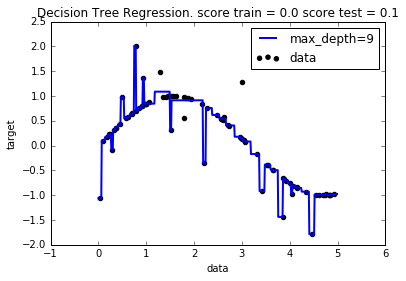

In [343]:

list_score_test = []
list_score_train = []

list_max_depth = np.arange(1,10)
for max_depth in list_max_depth:
    
    # Fit regression model
    clf = tree.DecisionTreeRegressor(max_depth=max_depth)
    clf.fit(X, y)
    score_train = score_regression(clf.predict(X),y)
    list_score_train.append(score_train)

    # Predict
    y_1 = clf.predict(X_test)
    score_test = score_regression(clf.predict(X_test),y_test)
    list_score_test.append(score_test)

    # Plot the results
    plt.figure()
    plt.scatter(X, y, c="black", label="data")
    plt.plot(X_test, y_1, c="blue", label="max_depth="+str(max_depth), linewidth=2)
    plt.xlabel("data")
    plt.ylabel("target")
    plt.title("Decision Tree Regression. score train = " + str(np.round(score_train,2)) +\
            " score test = " + str(np.round(score_test,2)))
    plt.legend()
    plt.show()

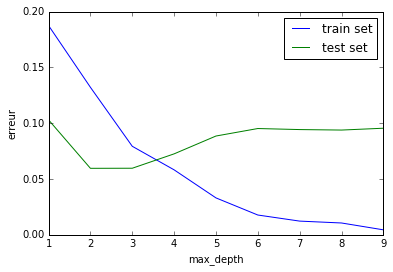

In [344]:
plt.plot(list_max_depth, list_score_train, label = 'train set')
plt.plot(list_max_depth, list_score_test, label = 'test set')
plt.xlabel('max_depth')
plt.ylabel('erreur')
plt.legend()

In [345]:
# Val set

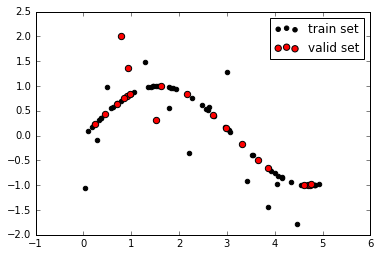

In [24]:

list_indices = np.arange(X.shape[0])
np.random.shuffle(list_indices)

n_valid = 20
indices_valid = list_indices[:n_valid] # reserve les 'n_valid' premiers pour la validation
indices_train = list_indices[n_valid:]


X_train = X[indices_train]
y_train = y[indices_train]

X_valid = X[indices_valid]
y_valid = y[indices_valid]

plt.scatter(X_train, y_train, c='black', label ='train set')
plt.scatter(X_valid, y_valid, c='red', s=40, label = 'valid set')
plt.legend()

In [25]:
from sklearn.cross_validation import train_test_split

In [33]:
X_train, X_val, y_train, y_val = train_test_split(X,y)

In [34]:
X_train.shape

(60, 1)

In [35]:
X_val.shape

(20, 1)

In [30]:
y_train.shape

(20, 1)

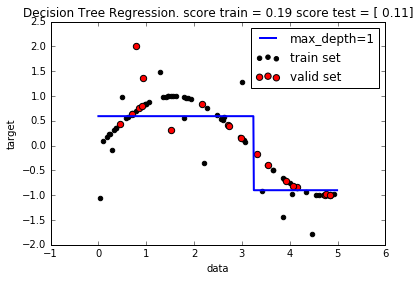

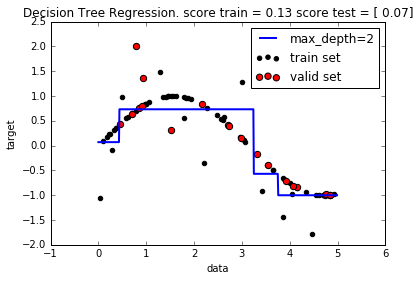

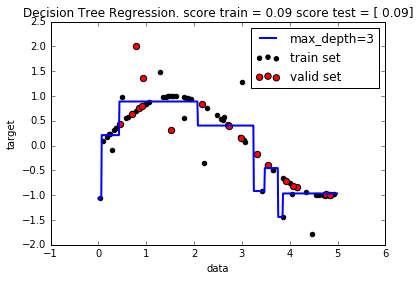

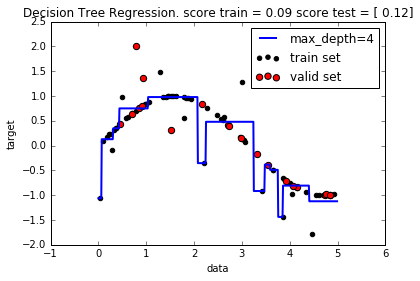

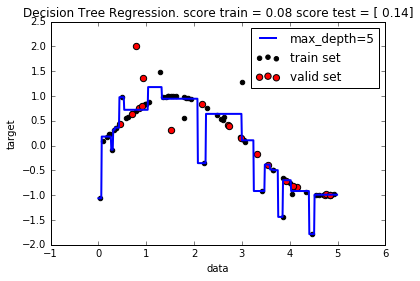

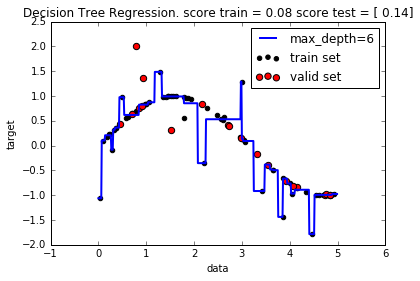

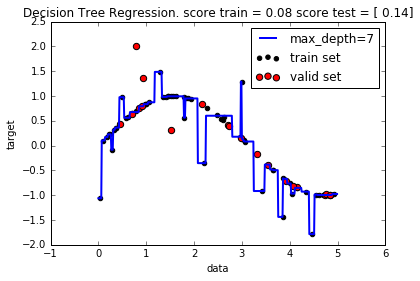

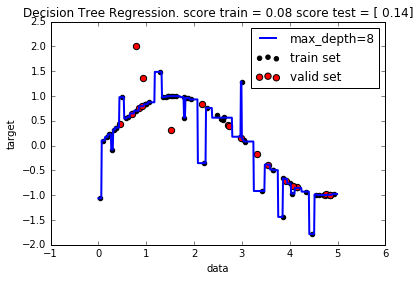

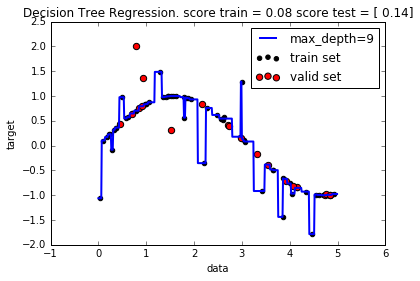

In [347]:

list_score_test = []
list_score_train = []
list_score_valid = []

list_max_depth = np.arange(1,10)
for max_depth in list_max_depth:
    
    # Fit regression model
    clf = tree.DecisionTreeRegressor(max_depth=max_depth)
    clf.fit(X_train, y_train)
    score_train = score_regression(clf.predict(X),y)
    list_score_train.append(score_train)
    
    #Valid 
    
    score_valid = score_regression(clf.predict(X_valid),y_valid)
    list_score_valid.append(score_valid)

    # Predict
    X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
    y_test = np.sin(X_test)
    y_1 = clf.predict(X_test)
    score_test = score_regression(clf.predict(X_test),y_test)
    list_score_test.append(score_test)

    # Plot the results
    plt.figure()
    plt.scatter(X, y, c="black", label="train set")
    plt.scatter(X_valid, y_valid, c='red', s=40, label = 'valid set')
    plt.plot(X_test, y_1, c="blue", label="max_depth="+str(max_depth), linewidth=2)
    plt.xlabel("data")
    plt.ylabel("target")
    plt.title("Decision Tree Regression. score train = " + str(np.round(score_train,2)) +\
            " score test = " + str(np.round(score_test,2)))
    plt.legend()
    plt.show()

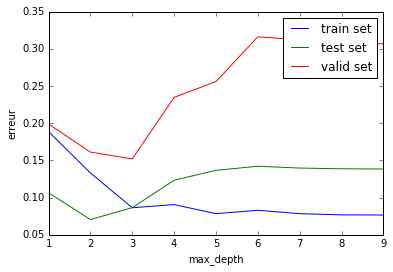

In [348]:
plt.plot(list_max_depth, list_score_train, label = 'train set')
plt.plot(list_max_depth, list_score_test, label = 'test set')
plt.plot(list_max_depth, list_score_valid, label = 'valid set')
plt.xlabel('max_depth')
plt.ylabel('erreur')
plt.legend()

In [349]:
max_depth_train = np.argmin(list_score_train) + 1
max_depth_test = np.argmin(list_score_test) + 1
max_depth_validation = np.argmin(list_score_valid) + 1

print(max_depth_train)
print(max_depth_test)
print(max_depth_validation)

9
2
3
